# Exporacion Inicial de los Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import importlib
# importlib.reload(plt)

In [2]:
# Configuración display y gráficos
pd.set_option('display.max_columns', 100) #Definir limite de columnas a mostrar
sns.set_theme(style="whitegrid") #Estilos para los graficos
plt.rcParams['figure.dpi'] = 110 #Dfinir una calidad estandar para los graficos

In [3]:
# Carga del Dataset Online_realil_II.xlsx
df = pd.read_excel('../data/raw/online_retail_II.xlsx')


Debido a que el dataset es muy grande y esta en una extencion de excel (lo cual es muy lenta para grandes volumenes de datos), la carga y manipulacion de los datos toma un tiempo considerable. Por lo tanto, se sugirere convertir el archivo a un formato mas adecuado, como CSV o Parquet, que permite operaciones mas rápidas, menor uso de memoria y una mejor integración con pandas para el procesamiento posterior.

## Revision y validacion inicial de los Datos

### Revicion Rapida de los Datos

In [4]:
# Revisión rápida del dataset
print("Shape:", df.shape)
display(df.head())
display(df.dtypes)
display(df.describe(include='all').T)
display(df.info())

Shape: (525461, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Invoice,525461.0,28816.0,537434.0,675.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,525461,4632,85123A,3516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,522533,4681,WHITE HANGING HEART T-LIGHT HOLDER,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,525461.0,NaN,NaN,NaN,10.337667,-9600.0,1.0,3.0,10.0,19152.0,107.42411
InvoiceDate,525461,NaN,NaN,NaN,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0,NaN,NaN,NaN,4.688834,-53594.36,1.25,2.1,4.21,25111.09,146.126914
Customer ID,417534.0,NaN,NaN,NaN,15360.645478,12346.0,13983.0,15311.0,16799.0,18287.0,1680.811316
Country,525461,40,United Kingdom,485852,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


None

<h5> Resultados de la Revision rápida del dataset </h5>

El Dataset "online_retail_II" originalmente contiene un total de 525.461 registros y 8 columnas.

Los registros corresponden a transacciones de ventas realizadas por una tienda online de productos entre diciembre de 2009 y diciembre de 2010.

En la inspeccion inicial del dataset, se observa que multples columnas presentan tipos de datos incorrectos o que no son adecuacuados para la variable, particularmente las columnas clasificadas como "object", ya que este tipo de dato es muy general y puede incluir tanto texto como números.

A su vez, se indentifican columnas con valores nulos, como "Customer ID" lo que indica porque su tipo es "float64" en lugar de "int64". 

Se detectan tambien valores negativos en la columna "Quantity", lo que sugiere la presencia de devoluciones o cancelaciones de pedidos, lo que requiere una limpieza y preprocesamiento adicional antes de proceder con el análisis, ya que estos valores no son necesacios para el objetivo del proyecto que es el cálculo del CLTV.

Se obverva tambien la fuerte presencia de valores atipicos en el dataset, especialmente en las columnas "Quantity" y "Price", ya que el std es considerablemente alto en comparación con la media, lo que indica una alta variabilidad en los datos.

Finalmente, la columna invoice solo tiene 28.816 valores unicos lo que podria indicar que cada registro del dataset no es una transaccion individual, sino que varios registros pueden estar asociados a una misma factura, es decir la compra de multiples productos en una sola transaccion, contiene multiples registros en el dataset.

### Validación de valores no positivos en las variables Quantity y Price

In [5]:
print(f"Cantidades <= 0: {(df['Quantity'] <= 0).sum()}")
print(f"Cantidades = 0: {(df['Quantity'] == 0).sum()}")
print(f"Precios <= 0: {(df['Price'] <= 0).sum()}")
print(f"Precios = 0: {(df['Price'] == 0).sum()}")

Cantidades <= 0: 12326
Cantidades = 0: 0
Precios <= 0: 3690
Precios = 0: 3687


Se observan valores en la variable 'Quantity' inferiores a 0, lo que indica la presencia de devoluciones o cancelaciones de pedidos en el dataset. Estos valores negativos son relevantes para el analisis, ya que al ser posibles devoluciones, se deben considerar para reflejar el impacto real de los ingresos Netos y el comportamiento del cliente. 

1. Las cantidades negativas deben mantenerse.
2. No deben eliminarse porque representan transacciones reales.
3. Su impacto es restar ingresos y mostrar el valor neto del cliente.




Ahora, en la Variable 'Price', se identifican valores inferiores a 0, lo que es inusual y puede indicar errores en la entrada de los datos, ya que los precios negativos no son comunes en transacciones comerciales. Tambien se identifican valores iguales a 0, lo que podria indicar promociones o productos gratuitos, debido al objetivo del proyecto, estos registros no seran considerados para el calculo del CLTV, ya que no aportan un valor real a los ingresos generados por los clientes.

1. Precio negativo no tiene sentido económico.
2. El CLTV requiere ingresos reales.

### Otras Validaciones de los Datos (Nulos, Duplicados, Tipos de Datos y entrada de datos)

In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Se observa la presencia de valores nulos en las columnas "Customer ID" y "Description", lo que sugiere una revision y limpieza adicional de los datos antes de proceder con el análisis.

In [7]:
df.duplicated().sum()

np.int64(6865)

Existen 6.865 valores duplicados en el dataset, los valores se revisaran y se eliminaran en caso de ser duplicados reales.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## Distribución y valores atípicos de las variables Numericas (Quantity & Price)

#### Validacion de valores atípicos (`Quantity` & `Price`)

In [9]:
# Definir la Columna y Calcular Límites
columnas = ['Quantity', 'Price']

for columna in columnas:
  Q1 = df[columna].quantile(0.25) # se obvtienen primer cuartil
  Q3 = df[columna].quantile(0.75) # se obtiene tercer cuartil
  IQR = Q3 - Q1 # rango intercuartil o tamaño de la caja
  limite_inferior = Q1 - 1.5 * IQR #obtiene el limite inferior
  limite_superior = Q3 + 1.5 * IQR # obtiene el limite superior


  outliers_df = df[(df[columna] > limite_superior) | (df[columna] < limite_inferior)] # Se obtienen los outliers mediante filtro.

  porcentaje = (len(outliers_df) / len(df)) * 100 #obtener porcentaje de outliers

  print(f"Total de registros atípicos {columna}: {len(outliers_df)}, {porcentaje:.0f}% del total de datos")

Total de registros atípicos Quantity: 57870, 11% del total de datos
Total de registros atípicos Price: 35273, 7% del total de datos


Se identificó que el **11%** de los registros de `Quantity` presentan valores atípicos, reflejando una alta dispersión y la presencia de transacciones con cantidades extremas. En el caso de `Price`, aproximadamente el **7%** de los registros fueron clasificados como atípicos, indicando una menor variabilidad relativa.


In [35]:
df[['Quantity','Price']].quantile([0.01, 0.99])

,Quantity,Price
0.01,-3.0,0.21
0.99,120.0,19.95


#### Distribución y valores atípicos de la variable `Quantity`

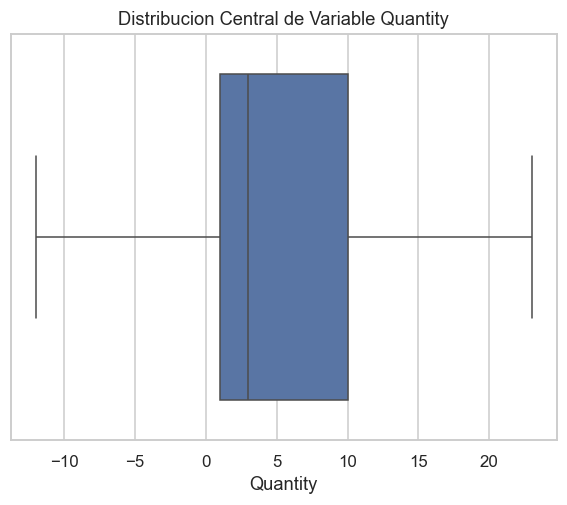

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Distribucion Central de Variable Quantity')
sns.boxplot(x=df['Quantity'], showfliers=False) #Filtro para ver distribucion central sin outliers
plt.show()

En la variable `Quantity`, se observa que la parte central de los valores se concentran entre 1 y 10, ademas se observa que la mediana esta inclinada hacia la izquierda y el bigote del boxplot es mas largo a la derecha, lo que indica que hay una asimetria positiva en la distribucion de los datos, lo que propablemente inidica, que los valores altos son mas variados que los valores bajos, es decir, hay mas dispersion en los valores altos de `Quantity`.


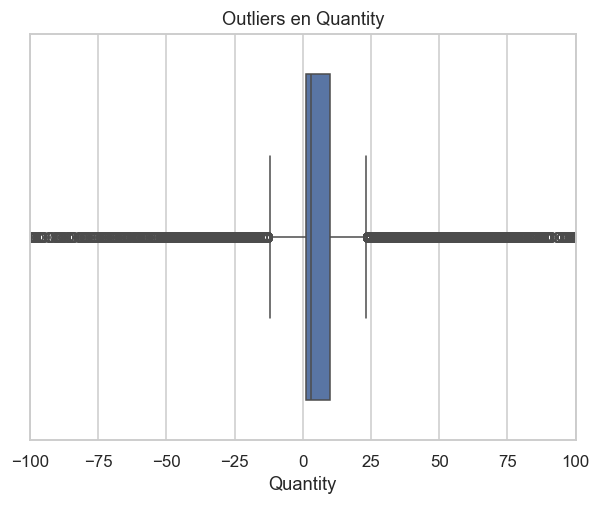

In [11]:
plt.title('Outliers en Quantity')
sns.boxplot(x=df['Quantity'])
plt.xlim(-100, 100) #Se establece limiter para mejor visualizacion
plt.show()

Se oberva una fuerte presencia de outliers en la  variable `Quantity` en ambos extremos, lo que indica que hay transacciones con cantidades negativas y positivas extremadamente altas en comparacion con la mayoria de los datos del boxplot dentro de un rango 'normal'. Se realizara un analisis mas detallado de estos outliers para verificar si son naturales o si son errores en los datos, sin embargo, es importante considerar que en un contexto de ventas, es posible que existan compras al por mayor, transacciones especiales y devoluciones que justifiquen estas cantidades extremas y negativas.

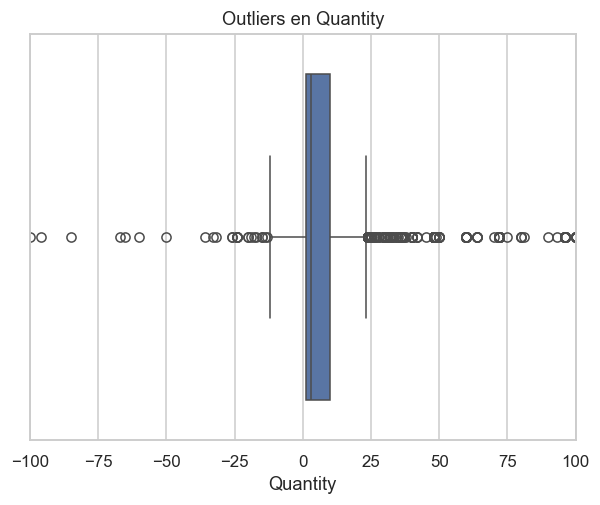

In [12]:
plt.title('Outliers en Quantity')
sns.boxplot(x=df['Quantity'].sample(10000, random_state=42)) #Tomar un muestra aleatoria de 10,000 valores para no saturar el grafico
plt.xlim(-100, 100)
plt.show()

Se toma una muestra de 10.000 registros aleatorios para evitar la saturacion visual de los datos, ademas de establecer limites en el eje X para aumentar la claridad de la visualizacion y facilitar la interpretacion de los datos.

#### Distribución y valores atípicos de la variable `Price`

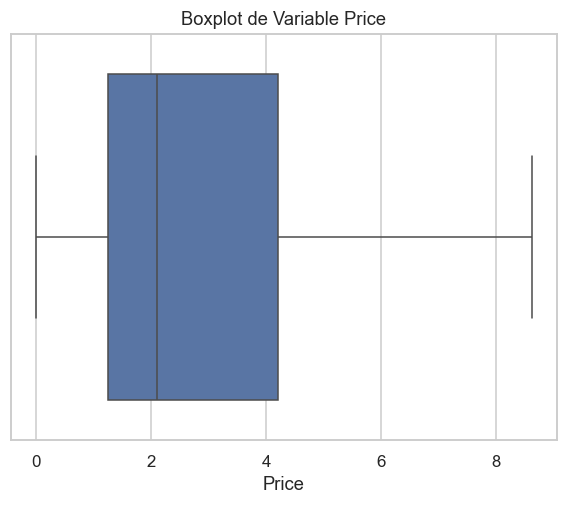

In [13]:
plt.title('Boxplot de Variable Price')
sns.boxplot(x=df['Price'], showfliers=False)
plt.show()

En la variable `Price`, se observa que la parte centrar de los valores esta entre 1 y 5, ademas se observa que la mediana esta inclinada hacia la izquierda y el bigote del boxplot es considerablemente mas largo a la derecha, lo que indica que hay una asimetria positiva en la distribucion de los datos, lo que propablemente inidica, que los valores altos son mas variados que los valores bajos, es decir, hay mas dispersion en los valores altos de `Price`.

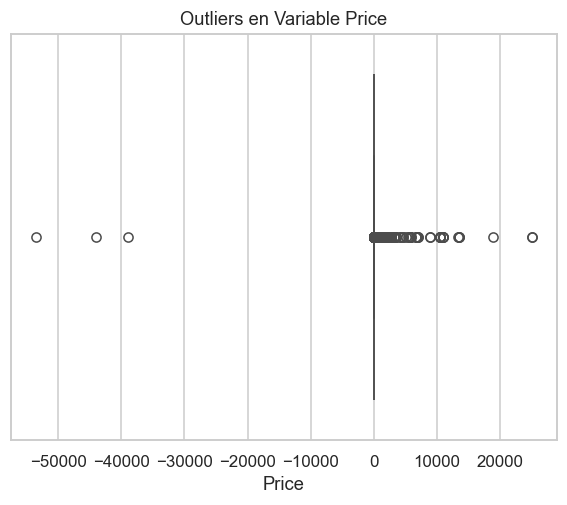

In [36]:
plt.title('Outliers en Variable Price')
sns.boxplot(x=df['Price'])
plt.show()

En la grafica anterior se observa la presencia de outliers, a su vez se identifica que la gran mayoria de los outliers son positivos, lo que puede indicar transacciones con precios extremadamente altos a comparacion de la distribucion central de los datos, se debera realizar un analisis detallado de estos outliers para determinar su naturaleza y decidir si deben ser tratados o eliminados en el proceso de limpieza de datos. Ademas, se nota la presencia de 3 outliers negativos, lo que indica potencialmente errores en la entrada de datos, debido a que no son datos logicos para el contexto del proyecto, deberan ser eliminados en el preprocesamiento de los datos.

<Axes: xlabel='Quantity', ylabel='Density'>

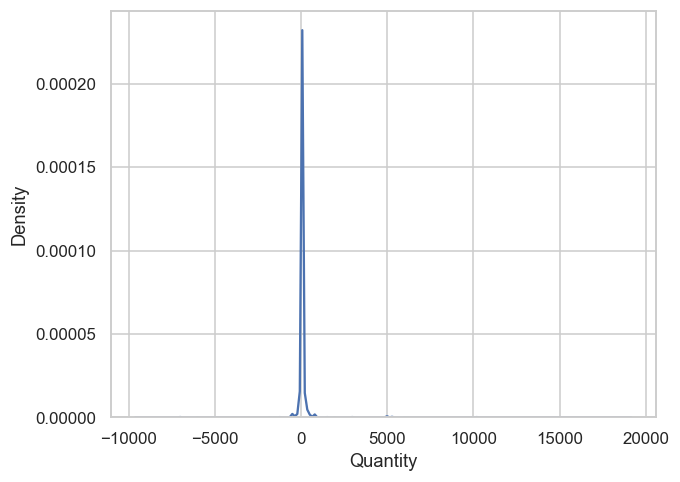

In [16]:
sns.kdeplot(df['Quantity'], bw_adjust=0.5)

(-1000.0, 1000.0)

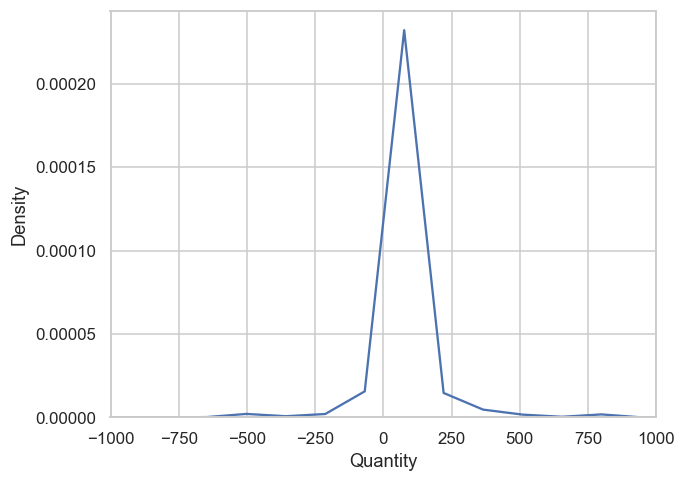

In [17]:
sns.kdeplot(df['Quantity'], bw_adjust=0.5)
plt.xlim(-1000, 1000)

1. Casi todos los valores de Quantity están muy cerca de 0

<Axes: xlabel='Quantity', ylabel='Price'>

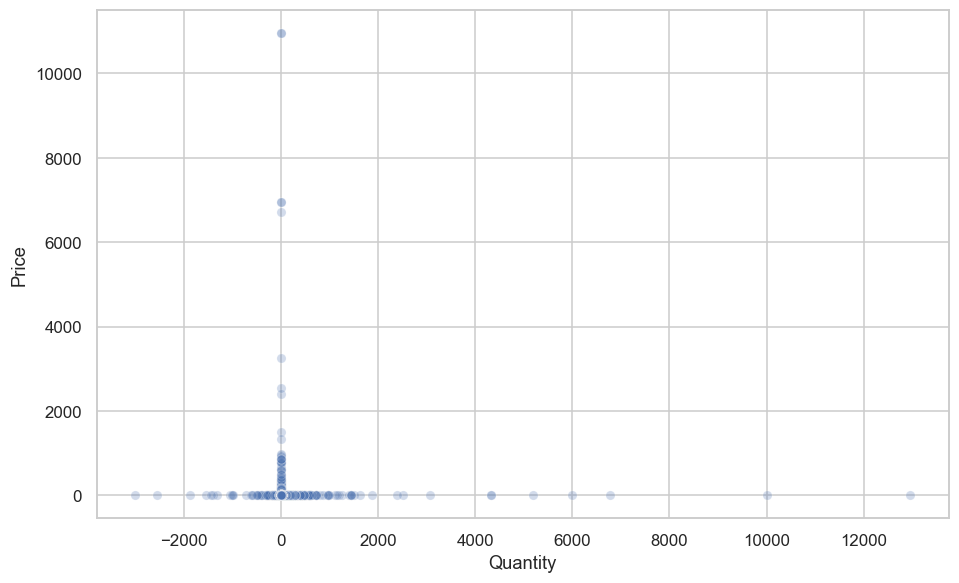

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df.sample(50000),
    x="Quantity", y="Price",
    alpha=0.25,
)


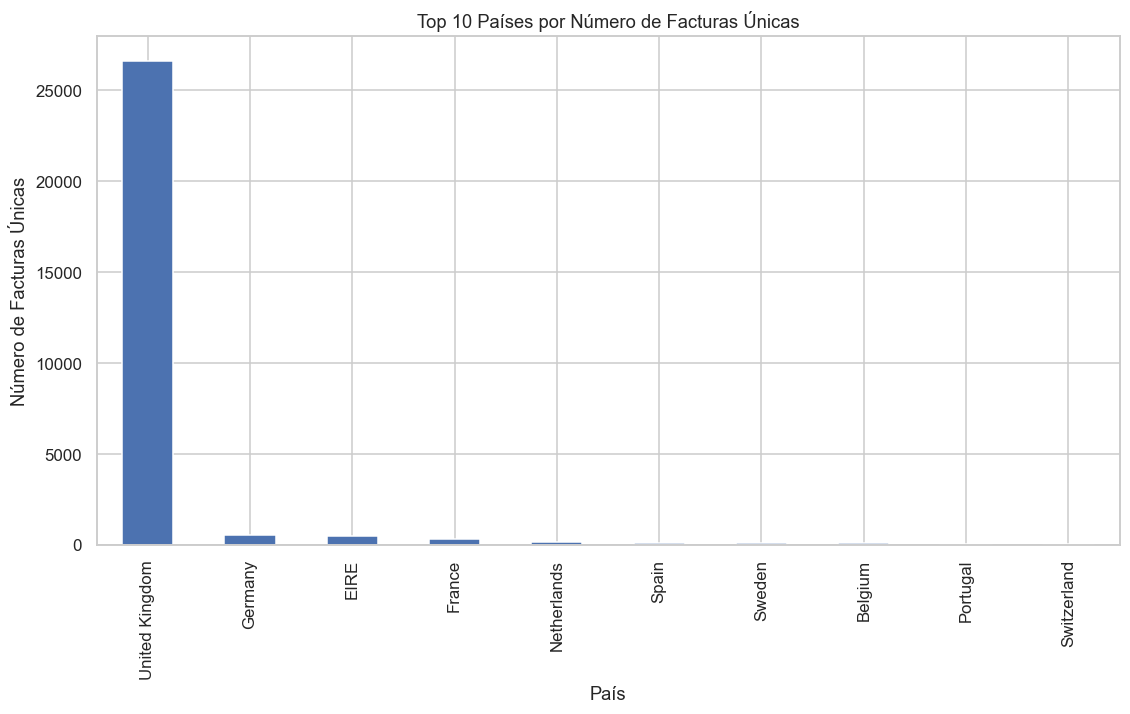

In [19]:
top_10_paises = (df.groupby('Country')['Invoice']
                 .nunique()
                 .sort_values(ascending=False)
                 .head(10))

plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar')
plt.title('Top 10 Países por Número de Facturas Únicas')
plt.xlabel('País')
plt.ylabel('Número de Facturas Únicas')
plt.show()

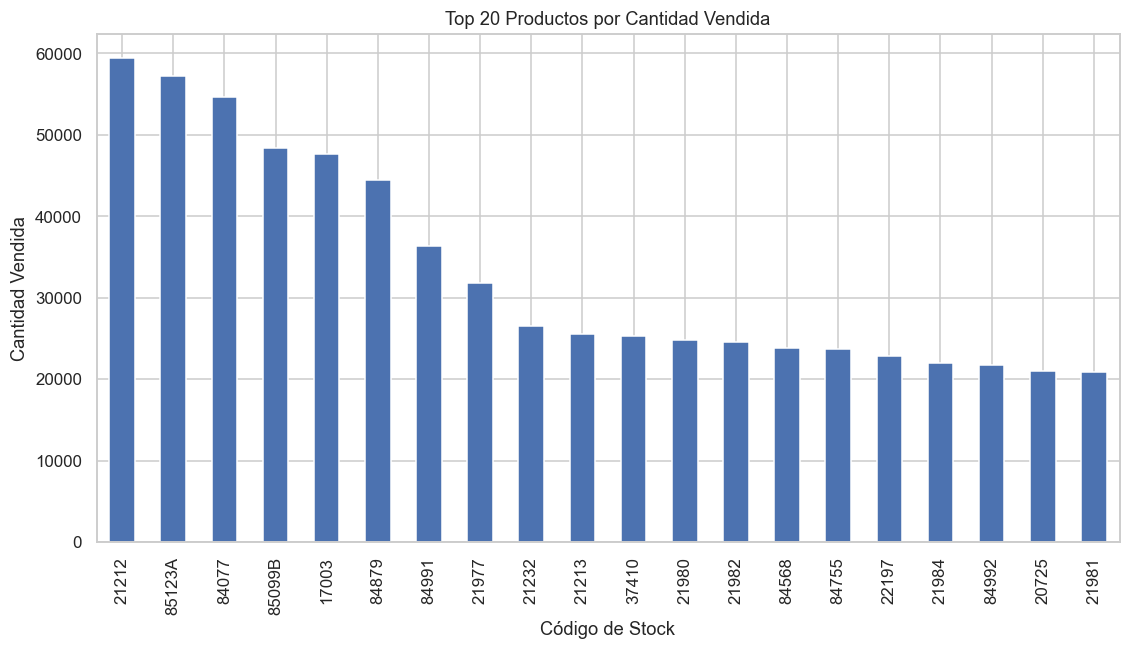

In [20]:
top_20_productos = (df.groupby('StockCode')['Quantity']
                    .sum()
                    .sort_values(ascending=False)
                    .head(20))

plt.figure(figsize=(12, 6))
top_20_productos.plot(kind='bar')
plt.title('Top 20 Productos por Cantidad Vendida')
plt.xlabel('Código de Stock')
plt.ylabel('Cantidad Vendida')
plt.show()

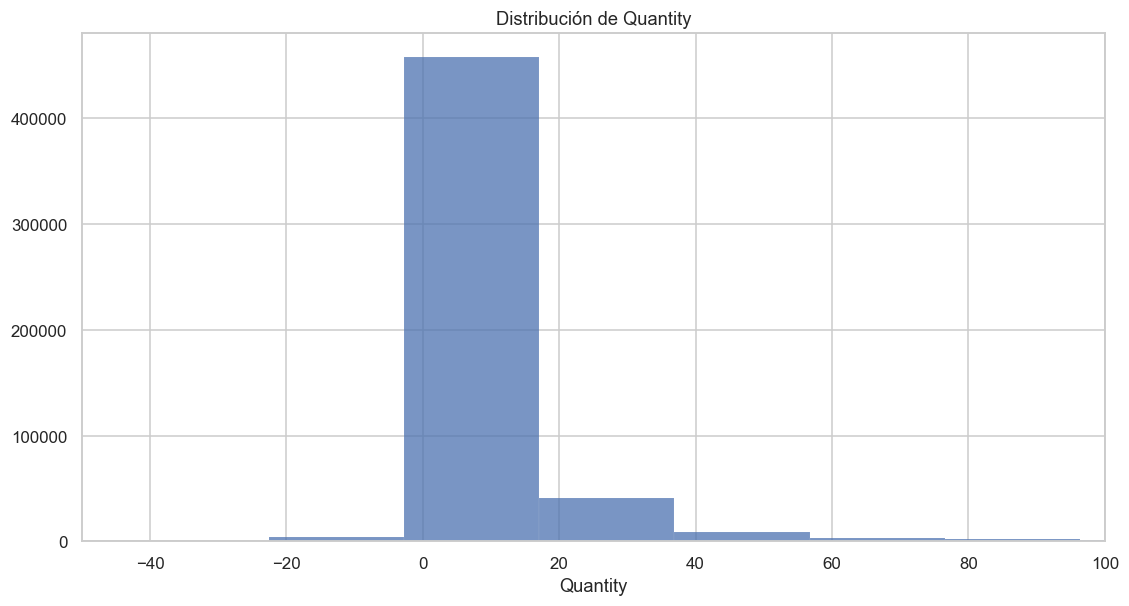

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Quantity'])
plt.xlim(-50,100)
plt.title('Distribución de Quantity')
plt.xlabel('Quantity')
plt.ylabel('')
plt.show()

In [22]:
df['year_month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

In [23]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12


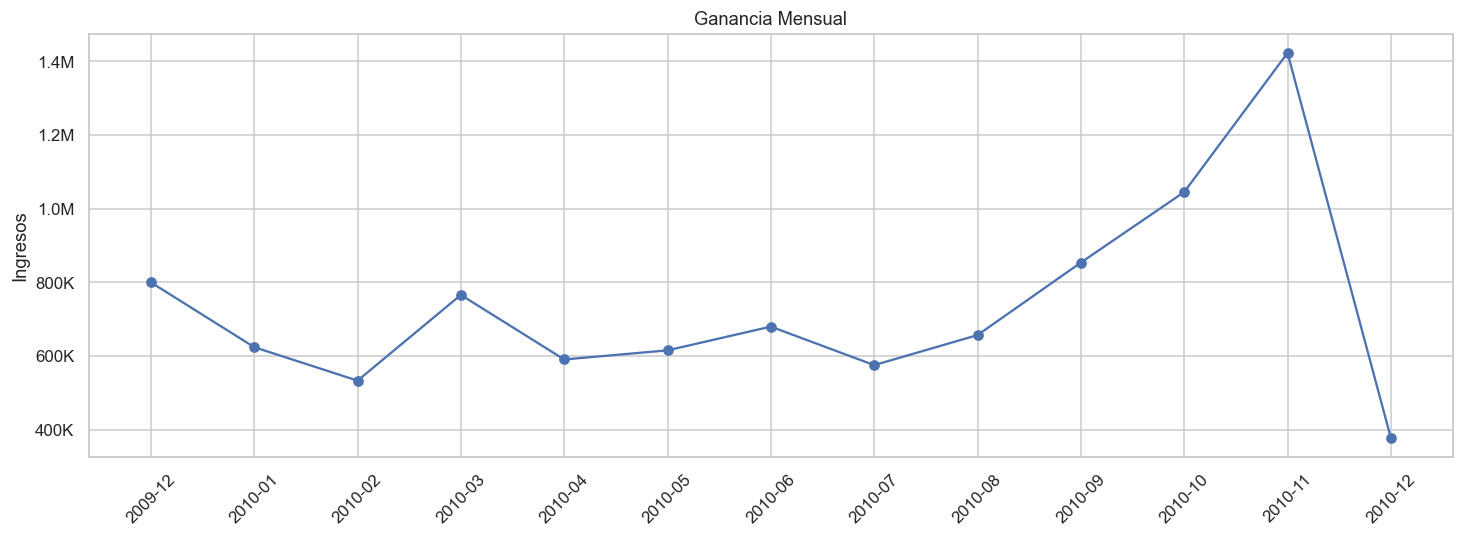

In [24]:
import matplotlib.ticker as mticker

def plt_monthly_revenue():
    def abbreviate_number(x, pos):
        if x >= 1_000_000:
            return f"{x/1_000_000:.1f}M"
        elif x >= 1_000:
            return f"{x/1_000:.0f}K"
        else:
            return f"{x:.0f}"

    df['totalprice'] = df['Quantity'] * df['Price']

    monthly_revenue = df.groupby('year_month')['totalprice'].sum()

    plt.figure(figsize=(16,5))
    plt.plot(monthly_revenue.index, monthly_revenue.values, marker="o")
    plt.xticks(rotation=45)
    plt.title("Ganancia Mensual")
    plt.ylabel("Ingresos")
    plt.grid(True)

    ax = plt.gca()
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(abbreviate_number))

    plt.show()

    return monthly_revenue

monthly_revenue = plt_monthly_revenue()

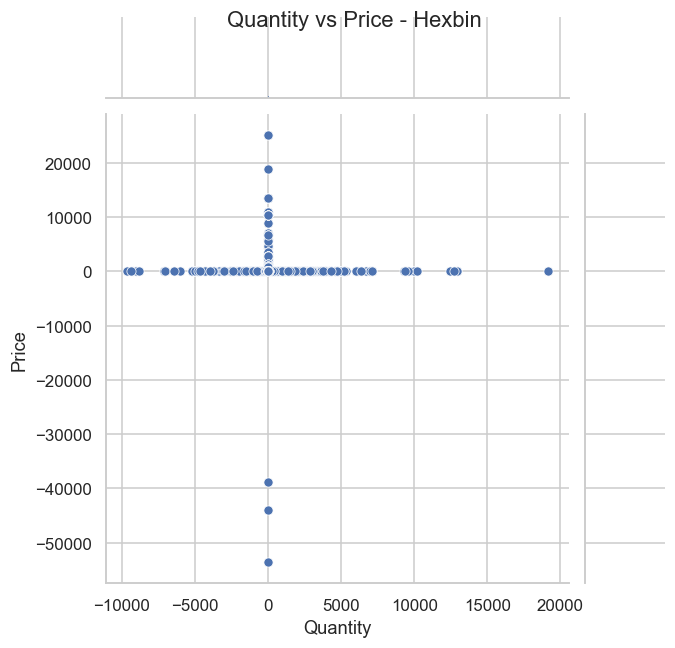

In [25]:
sns.jointplot(
    data=df,
    x='Quantity',
    y='Price',
)
plt.suptitle("Quantity vs Price - Hexbin")
plt.show()

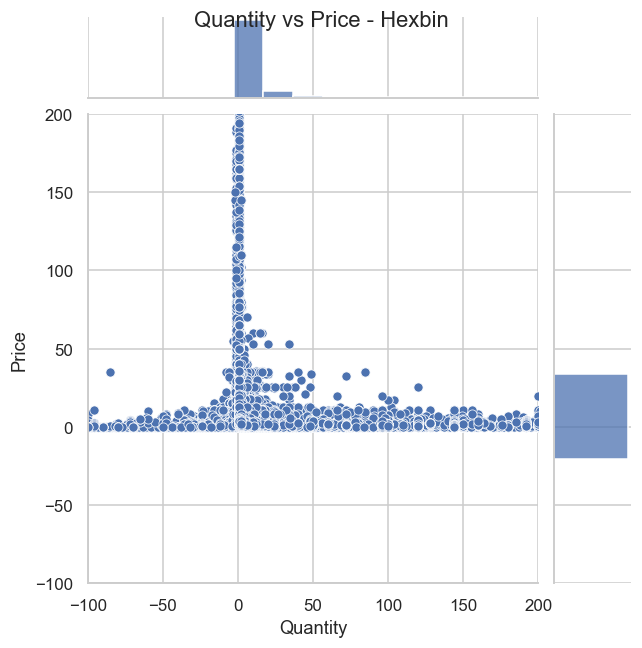

In [26]:
sns.jointplot(
    data=df,
    x='Quantity',
    y='Price',
    xlim=(-100, 200),
    ylim=(-100, 200)
)
plt.suptitle("Quantity vs Price - Hexbin")
plt.show()

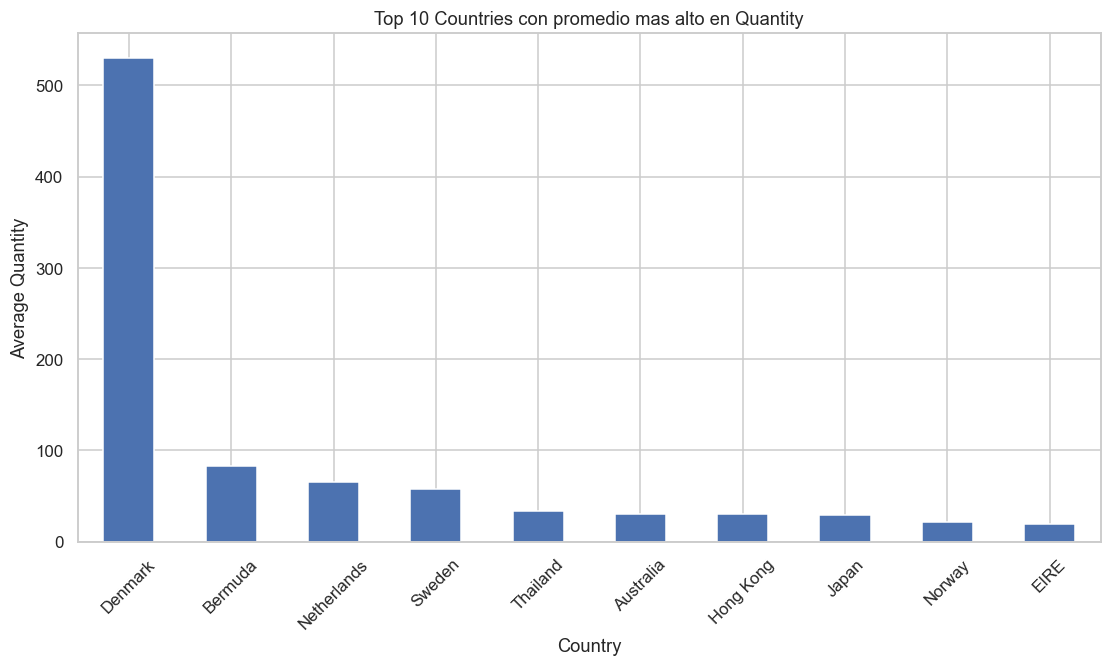

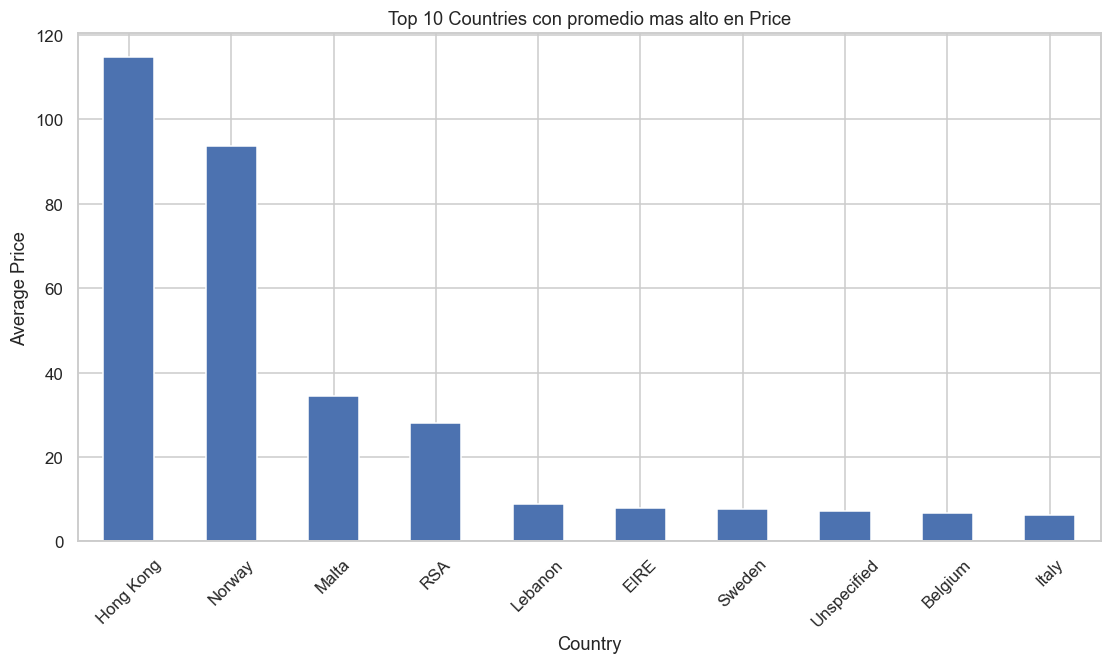

In [27]:
columnas = ['Quantity', 'Price']

for columna in columnas:
  top_countries = (
      df.groupby('Country')[columna]
        .mean()
        .sort_values(ascending=False)
        .head(10)
  )

  plt.figure(figsize=(12, 6))
  top_countries.plot(kind='bar')
  plt.xlabel('Country')
  plt.ylabel(f'Average {columna}')
  plt.title(f'Top 10 Countries con promedio mas alto en {columna}')
  plt.xticks(rotation=45)
  plt.show()


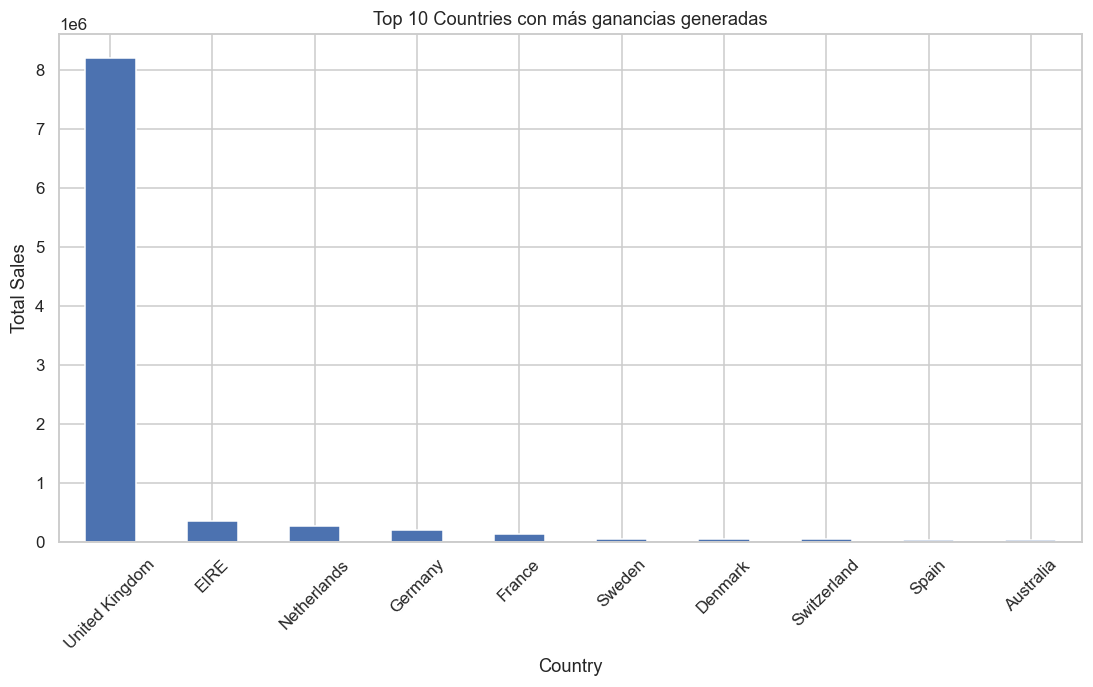

In [28]:
top_countries = (
    df.groupby('Country')['totalprice']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 10 Countries con más ganancias generadas')
plt.xticks(rotation=45)
plt.show()
